In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.fsystem

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"
dnames = ["WT-1", "WT-2", "WT-3", "G150A-1", "G150A-2", "G150A-3", "G150T-1", "G150T-2", "G150T-3"]

In [6]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple",\
          "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]

dpi =  467


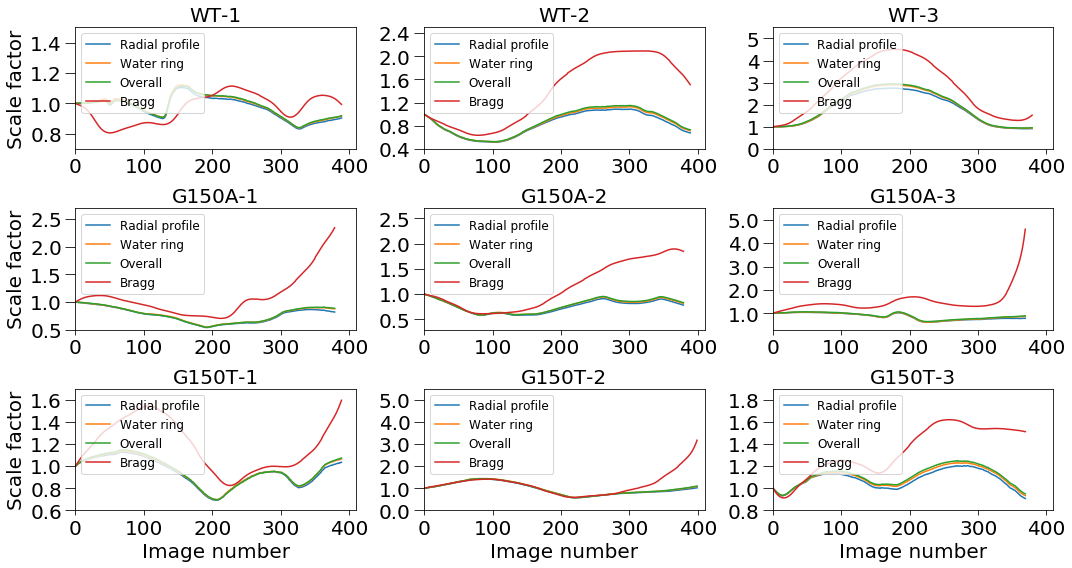

In [8]:
plt.figure(figsize=(15,8))

for idx, dname in enumerate(dnames):
    path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca.dsdata"%(workdir,dname)
    per_image_multiply_scale_profile = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"scale_factor"))

    path_dsdata = "%s/data/%s/standard_clean_data_scale_water_with_pca.dsdata"%(workdir,dname)
    per_image_multiply_scale_water_ring = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"scale_factor"))
    
    path_dsdata = "%s/data/%s/standard_clean_data_scale_overall_with_pca.dsdata"%(workdir,dname)
    per_image_multiply_scale_overall = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"scale_factor"))
    
    path_dsdata = "%s/data/%s/standard_clean_data_scale_bragg_with_pca.dsdata"%(workdir,dname)
    per_image_multiply_scale_dials = np.load(scripts.fsystem.H5manager.reader(path_dsdata,"scale_factor"))

    plt.subplot(3,3,idx+1)
    plt.plot(per_image_multiply_scale_profile,     "-", label="Radial profile",   color=colors[0])
    plt.plot(per_image_multiply_scale_water_ring,  "-", label="Water ring", color=colors[1])
    plt.plot(per_image_multiply_scale_overall,     "-", label="Overall", color=colors[2])
    plt.plot(per_image_multiply_scale_dials,       "-", label="Bragg", color=colors[3])
    
    plt.xlim(0,410)
    
    if idx==0:
        plt.yticks(np.around(np.arange(0.8,1.5,0.2),1),np.around(np.arange(0.8,1.5,0.2),1))
        plt.ylim(0.7,1.5)
    elif idx==1:
        plt.yticks(np.around(np.arange(0.4,2.5,0.4),1),np.around(np.arange(0.4,2.5,0.4),1))
        plt.ylim(0.4,2.5)
    elif idx==2:
        plt.yticks(np.around(np.arange(0,6,1),1),np.around(np.arange(0,6,1),1))
        plt.ylim(0,5.5)
    elif idx==3:
        plt.yticks(np.around(np.arange(0.5,2.6,0.5),1),np.around(np.arange(0.5,2.6,0.5),1))
        plt.ylim(0.5,2.7)
    elif idx==4:
        plt.yticks(np.around(np.arange(0.5,3,0.5),1),np.around(np.arange(0.5,3,0.5),1))
        plt.ylim(0.3,2.7)
    elif idx==5:
        plt.yticks(np.around(np.arange(1,5.1,1),1),np.around(np.arange(1,5.1,1),1))
        plt.ylim(0.3,5.5)
    elif idx==6:
        plt.yticks(np.around(np.arange(0.6,1.7,0.2),1),np.around(np.arange(0.6,1.7,0.2),1))
        plt.ylim(0.6,1.7)
    elif idx==7:
        plt.yticks(np.around(np.arange(0,5.5,1),1),np.around(np.arange(0,5.5,1),1))
        plt.ylim(0.,5.5)
    elif idx==8:
        plt.yticks(np.around(np.arange(0.8,1.9,0.2),1),np.around(np.arange(0.8,1.9,0.2),1))
        plt.ylim(0.8,1.9)
    
        
    plt.legend(loc=2,fontsize=12)
    plt.title("%s"%dname, fontsize=20)
    if idx in [6,7,8]:
        plt.xlabel("Image number",fontsize=20)
    if idx in [0,3,6]:
        plt.ylabel("Scale factor",fontsize=20)
        
    plt.xticks(range(0,401,100),range(0,401,100),fontsize=20)
    plt.yticks(fontsize=20)
    plt.tick_params('y', length=10,  which='major')
    plt.tick_params('x', length=5, which='major')
    plt.tight_layout()
    
fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_S12_Scale_Factors.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_S12_Scale_Factors.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()